<a href="https://colab.research.google.com/github/Vikie2233/Assingment/blob/main/Data_Engineering_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

Loading the Dataset

In [ ]:
data = pd.read_csv("/content/archive (3).zip")

In [ ]:
#display first 5 rows
data.head(6)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M


In [ ]:
#display last 5 rows
data.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16533,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [ ]:
#Checking data type
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Droping Duplicate rows

In [ ]:
data.shape

(16534, 11)

In [ ]:
Duplicate_rows_data = data[data.duplicated()]
print('number of duplicate rows:', Duplicate_rows_data.shape)

number of duplicate rows: (6421, 11)


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(10113, 11)

Counting Number of Rows

In [ ]:
data.count()

work_year             10113
experience_level      10113
employment_type       10113
job_title             10113
salary                10113
salary_currency       10113
salary_in_usd         10113
employee_residence    10113
remote_ratio          10113
company_location      10113
company_size          10113
dtype: int64

In [ ]:
print (data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
data['work_year'].value_counts()

work_year
2023    4632
2024    4074
2022    1116
2021     216
2020      75
Name: count, dtype: int64

Relese Year

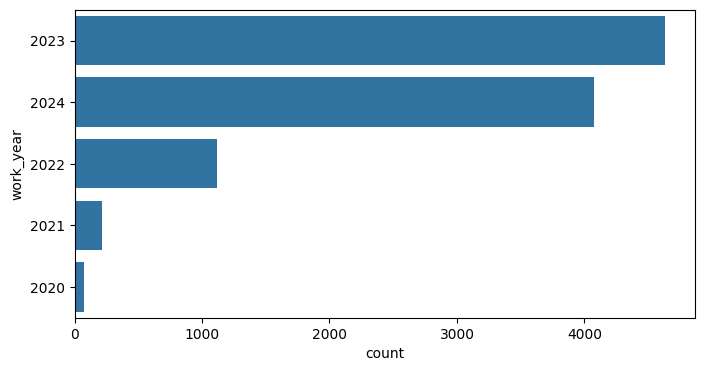

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(y="work_year", data=data, order=data.work_year.value_counts().index[0:15])

In [ ]:
data['salary_currency'].value_counts()

salary_currency
USD    9072
GBP     482
EUR     385
CAD      55
INR      55
AUD      12
CHF       8
PLN       7
SGD       6
BRL       5
DKK       4
JPY       4
TRY       3
HUF       3
ILS       2
NOK       2
THB       2
NZD       1
PHP       1
ZAR       1
HKD       1
MXN       1
CLP       1
Name: count, dtype: int64

Ordinal Encoding

In [ ]:
!pip install sklearn.preprocessing

In [ ]:
#importing ordinal encoding from sklearn
from sklearn.preprocessing import OrdinalEncoder
#Defining order of categories accoding to columns
oe=OrdinalEncoder(categories=[['SE','MI','EN','EX'],['FT','PT','CT','ST','FL'],['M','L','S']])

In [ ]:
#Initializing OrdinalEncoder
data[['experience_level','employment_type','company_size']]= oe.fit_transform(data[['experience_level','employment_type','company_size']])

In [ ]:
data['experience_level'].value_counts()

experience_level
0.0    5950
1.0    2761
2.0    1011
3.0     391
Name: count, dtype: int64

LabeL Encoding

In [ ]:
# import labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_en= LabelEncoder()

#fit labelencoding from sklearn
data['job_title']= label_en.fit_transform (data['job_title'])
data['employee_residence']= label_en.fit_transform (data['employee_residence'])
data['company_location']= label_en.fit_transform (data['company_location'])


In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,0.0,0.0,2,202730,USD,202730,84,0,74,0.0
1,2024,0.0,0.0,2,92118,USD,92118,84,0,74,0.0
2,2024,0.0,0.0,57,130500,USD,130500,84,0,74,0.0
3,2024,0.0,0.0,57,96000,USD,96000,84,0,74,0.0
4,2024,0.0,0.0,120,190000,USD,190000,84,0,74,0.0


In [ ]:
#Droping unnecessary colums
data.drop(['salary','salary_currency'], axis = 1, inplace = True)

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,0.0,0.0,2,202730,84,0,74,0.0
1,2024,0.0,0.0,2,92118,84,0,74,0.0
2,2024,0.0,0.0,57,130500,84,0,74,0.0
3,2024,0.0,0.0,57,96000,84,0,74,0.0
4,2024,0.0,0.0,120,190000,84,0,74,0.0


Salary In USD

<Axes: xlabel='salary_in_usd'>

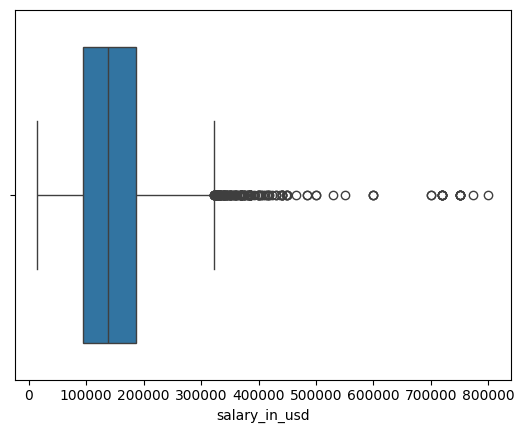

In [ ]:
sns.boxplot(x=data['salary_in_usd'])

In [ ]:
# finding the outlier
percentile25=data["salary_in_usd"].quantile(0.25)
percentile75=data["salary_in_usd"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 322250.0
lower_limit -41350.0


In [ ]:
#Capping
new_data_cap = data.copy()

new_data_cap["salary_in_usd"] = np.where(
    new_data_cap["salary_in_usd"] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap["salary_in_usd"] < lower_limit,
        lower_limit,
        new_data_cap["salary_in_usd"]
    )
)

In [ ]:
# Assigning the modified "distance" column back to the original dataset
data['salary_in_usd'] = new_data_cap['salary_in_usd']
upper_limit = 322250.0
lower_limit = -41350.0

<Axes: xlabel='salary_in_usd'>

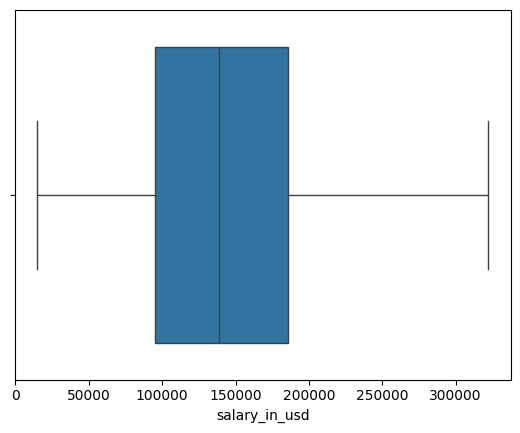

In [ ]:
sns.boxplot(x=data['salary_in_usd'])

Remote Rationing

<Axes: xlabel='remote_ratio'>

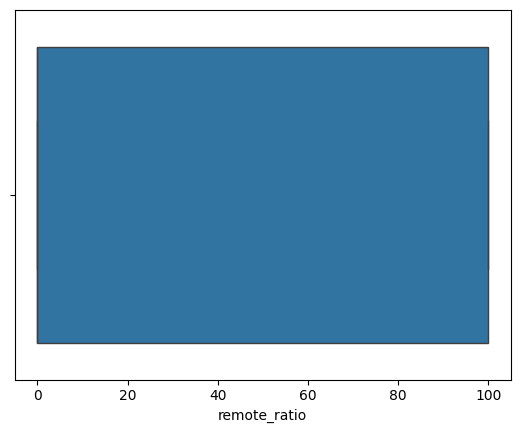

In [ ]:
sns.boxplot(x=data['remote_ratio'])

Converting the work year column to string

In [ ]:
data['work_year'] = data['work_year'].astype(str)
data = data[data['work_year'].apply(lambda x: x.isnumeric())]

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,0.0,0.0,2,202730.0,84,0,74,0.0
1,2024,0.0,0.0,2,92118.0,84,0,74,0.0
2,2024,0.0,0.0,57,130500.0,84,0,74,0.0
3,2024,0.0,0.0,57,96000.0,84,0,74,0.0
4,2024,0.0,0.0,120,190000.0,84,0,74,0.0


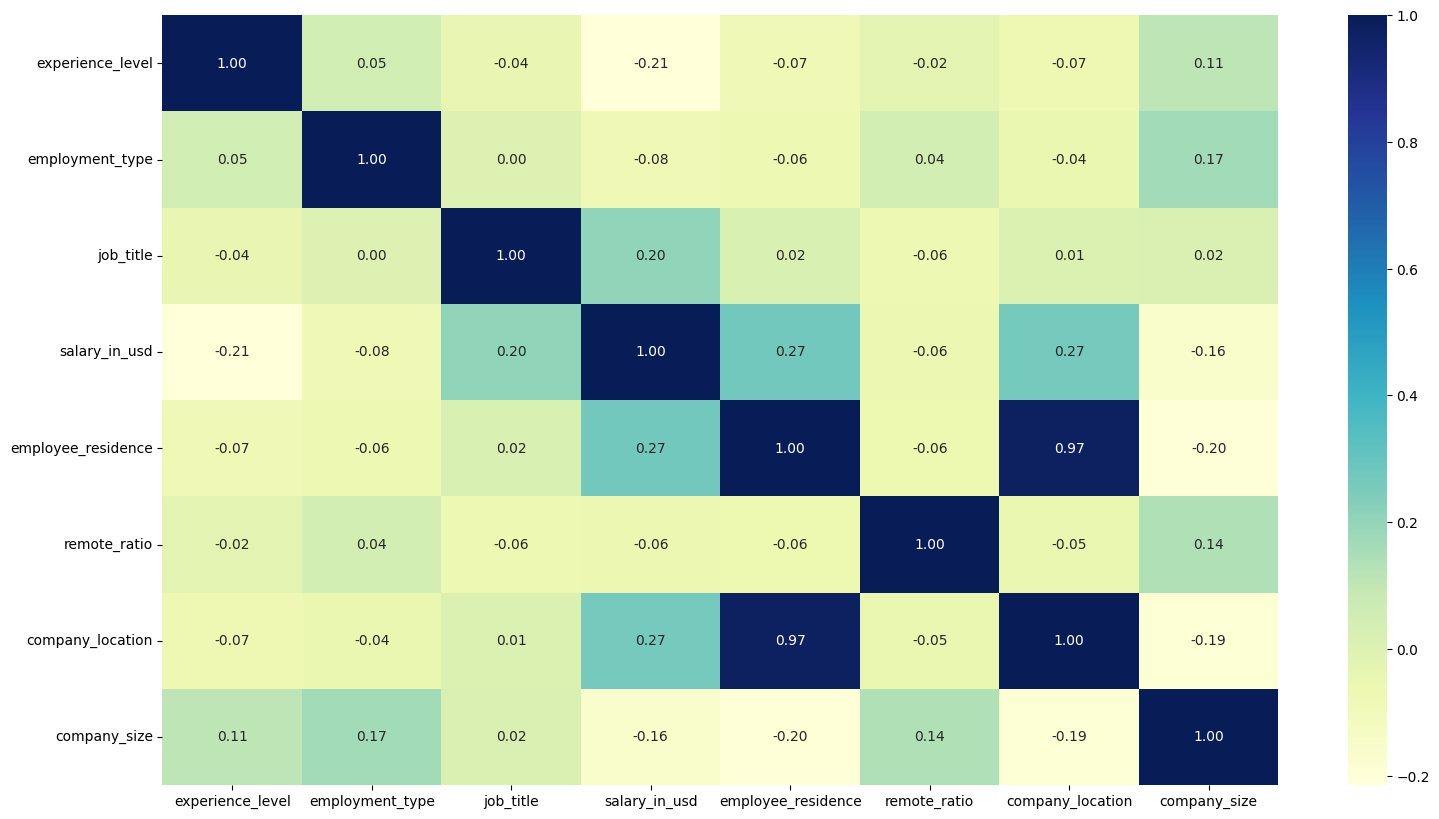

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame 'data'

# Selecting only the numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Checking if the numeric DataFrame is empty
if numeric_data.empty:
    raise ValueError("No numeric columns available for correlation matrix.")

# Generating the correlation matrix
corr_matrix = numeric_data.corr()

# Ploting the heatmap
plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

In [ ]:
#Droping Unecessary Columns
data.drop(['company_location'], axis = 1, inplace = True)

In [ ]:
#Spliting Data to be used in Models
#Creating matric of feature
x = data.drop('salary_in_usd', axis = 1)

In [ ]:
#Creating Target Variables
y = data['salary_in_usd']

In [ ]:
#invistagating the x data frame
print(x.dtypes)

work_year              object
experience_level      float64
employment_type       float64
job_title               int64
employee_residence      int64
remote_ratio            int64
company_size          float64
dtype: object


In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_transform,y,test_size=0.3,random_state=101)

In [ ]:
x_transform

array([[ 0.98613275, -0.7173682 , -0.07735904, ...,  0.43209041,
        -0.75284285, -0.28151915],
       [ 0.98613275, -0.7173682 , -0.07735904, ...,  0.43209041,
        -0.75284285, -0.28151915],
       [ 0.98613275, -0.7173682 , -0.07735904, ...,  0.43209041,
        -0.75284285, -0.28151915],
       ...,
       [-4.12024744,  1.71874483, -0.07735904, ...,  0.43209041,
         1.36466507,  5.32281779],
       [-4.12024744,  1.71874483, 10.35373416, ...,  0.43209041,
         1.36466507,  2.52064932],
       [-2.84365239, -0.7173682 , -0.07735904, ..., -1.48154035,
         0.30591111,  2.52064932]])

#in conclusion, the analysis of data engineer salaries in 2024 underscores the dynamic nature of the data engineering landscape, characterized by evolving compensation patterns influenced by factors such as experience, geography, employment type, and company size. As organizations continue to prioritize data-driven decision-making and digital transformation initiatives, the demand for skilled data engineers is expected to remain robust, driving further evolution in salary trends and employment dynamics within the field.